In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import sys
from time import time

# Problem 2

## Part a

10 0.1 7.890332163210708e-05 0.06695055961608887
20 0.05 1.9745627594588276e-05 0.008531808853149414
40 0.025 4.936638735621921e-06 0.0319366455078125
80 0.0125 1.2341582552915492e-06 0.818840503692627
160 0.00625 3.0853922485434837e-07 25.906237363815308
a=3.22e-05, b=2.38


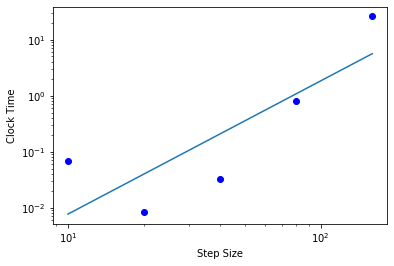

In [2]:
s=sqrt(0.75)
steps = [10,20,40,80,160]

# Function to map an interior index (i,j) into the vector index
def ind(i,j,n):
    return i-1+(j-1)*(2*n-2-j)//2

# Source term for the desired reference solution
def fun(x,y):
    return -8*(sqrt(3)-2*y)*cos(y)+4*(-4-3*x+3*x*x+sqrt(3)*y-y*y)*sin(y)

# Reference solution
def uex(x,y):
    return ((2*y-sqrt(3))**2-3*(2*x-1)**2)*sin(y)

# Function to check whether an index pair (i,j) is the interior of the grid
def inrange(i,j,n):
    return i>0 and j>0 and i+j<n

def poisson_tri(n):
    h=1./n
    m=(n-1)*(n-2)//2

    # Create derivative matrix and source term
    d=np.zeros((m,m))
    f=np.empty((m))
    hfac=1/(3*h*h)
    for j in range(1,n):
        for i in range(1,n-j):
            ij=ind(i,j,n)

            # Derivative matrix
            d[ij,ij]=-12*hfac
            if(inrange(i+1,j,n)): d[ij,ind(i+1,j,n)]=2*hfac
            if(inrange(i,j-1,n)): d[ij,ind(i,j-1,n)]=2*hfac
            if(inrange(i-1,j+1,n)): d[ij,ind(i-1,j+1,n)]=2*hfac

            # Additional lines for the stencil in part (b)
            if(inrange(i-1,j,n)): d[ij,ind(i-1,j,n)]=2*hfac
            if(inrange(i,j+1,n)): d[ij,ind(i,j+1,n)]=2*hfac
            if(inrange(i+1,j-1,n)): d[ij,ind(i+1,j-1,n)]=2*hfac

            # Source term
            f[ij]=fun(h*(i+0.5*j),h*s*j)

    # Solve the linear system
    u=np.linalg.solve(d,f)

    # Compute error
    uerr=0
    for j in range(1,n):
        for i in range(1,n-j):
            du=uex(h*(i+0.5*j),h*s*j)-u[ind(i,j,n)]
            uerr+=du*du
    return sqrt(s*uerr/(2*n*n))

# Loop over a range of grid sizes and compute the error
times = []
for n in steps:
    t0 = time()
    res = poisson_tri(n)
    t1 = time()
    print(n, 1/n, res, t1-t0)
    times.append(t1 - t0)
    
A = np.asmatrix([[np.log(step), 1] for step in steps])
b, a = np.linalg.lstsq(A, np.log(times), rcond=None)[0]
a = np.exp(a)
fit = [a*n**b for n in steps]
print(f"a={a:.3}, b={b:.3}")

plt.loglog(steps, times, 'bo')
plt.loglog(steps, fit)
plt.xlabel("Step Size")
plt.ylabel("Clock Time")
plt.show()

## Part b-d

In [3]:
s=sqrt(0.75)
steps = [10,20,40,80,160]

def A(q):
    return 0

tol = 10e-10
def conjugate_gradient(n):
    h=1./n
    m=(n-1)*(n-2)//2
    
    p = np.zeros(m)

"""
# Loop over a range of grid sizes and compute the error
times = []
for n in steps:
    t0 = time()
    print(n, 1/n, conjugate_gradient(n))
    t1 = time()
    times.append(t1 - t0)

A = np.asmatrix([[np.log(step), 1] for step in steps])
b, a = np.linalg.lstsq(A, np.log(times), rcond=None)[0]
a = np.exp(a)
fit = [a*n**b for n in steps]
print(f"a={a:.3}, b={b:.3}")

plt.loglog(steps, times, 'bo')
plt.loglog(steps, fit)
plt.xlabel("Step Size")
plt.ylabel("Clock Time")
plt.show()
"""

'\n# Loop over a range of grid sizes and compute the error\ntimes = []\nfor n in steps:\n    t0 = time()\n    print(n, 1/n, conjugate_gradient(n))\n    t1 = time()\n    times.append(t1 - t0)\n\nA = np.asmatrix([[np.log(step), 1] for step in steps])\nb, a = np.linalg.lstsq(A, np.log(times), rcond=None)[0]\na = np.exp(a)\nfit = [a*n**b for n in steps]\nprint(f"a={a:.3}, b={b:.3}")\n\nplt.loglog(steps, times, \'bo\')\nplt.loglog(steps, fit)\nplt.xlabel("Step Size")\nplt.ylabel("Clock Time")\nplt.show()\n'

# Problem 3